In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Automatically download dataset from a public URL
dataset_url = "https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv"

# Download the file
!wget -q $dataset_url -O Churn_Modelling.csv

# Read into pandas DataFrame
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")

# Display first few rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Drop unnecessary columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

# Encode categorical variables
label_encoder_geo = LabelEncoder()
label_encoder_gender = LabelEncoder()

df["Geography"] = label_encoder_geo.fit_transform(df["Geography"])
df["Gender"] = label_encoder_gender.fit_transform(df["Gender"])

# Features & Target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
lr_acc = accuracy_score(y_test, log_reg.predict(X_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.4f}")


Logistic Regression Accuracy: 0.8050
Random Forest Accuracy: 0.8595
Gradient Boosting Accuracy: 0.8700


In [5]:
accuracies = {"Logistic Regression": lr_acc, "Random Forest": rf_acc, "Gradient Boosting": gb_acc}
best_model_name = max(accuracies, key=accuracies.get)
best_model = {"Logistic Regression": log_reg, "Random Forest": rf, "Gradient Boosting": gb}[best_model_name]

print(f"✅ Best Model: {best_model_name}")


✅ Best Model: Gradient Boosting


In [6]:
# Predict churn for entire dataset
predictions = best_model.predict(X_scaled)
prediction_probs = best_model.predict_proba(X_scaled)[:, 1]

# Add predictions to DataFrame
df_results = df.copy()
df_results["Predicted_Churn"] = predictions
df_results["Churn_Probability"] = prediction_probs

# Show first 10 rows
df_results.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted_Churn,Churn_Probability
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0,0.300069
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,0,0.212540
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,0.950988
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,0.044175
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,0.098535
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1,0,0.138309
6,822,0,1,50,7,0.00,2,1,1,10062.80,0,0,0.079871
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1,1,0.992066
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0,0,0.054549
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0,0,0.045670


Accuracy on Full Dataset: 0.8789

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7963
           1       0.82      0.52      0.64      2037

    accuracy                           0.88     10000
   macro avg       0.85      0.75      0.78     10000
weighted avg       0.87      0.88      0.87     10000



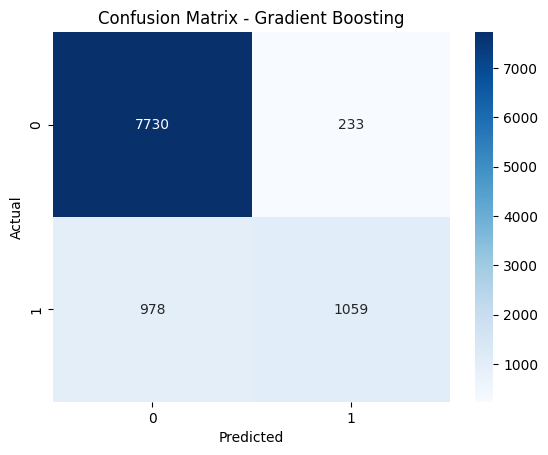

In [7]:
print("Accuracy on Full Dataset:", accuracy_score(y, predictions))
print("\nClassification Report:")
print(classification_report(y, predictions))

cm = confusion_matrix(y, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

In [8]:
# Save predictions to CSV
df_results.to_csv("churn_predictions.csv", index=False)
print("Predictions saved as churn_predictions.csv")


Predictions saved as churn_predictions.csv


# Predict churn for entire dataset
predictions = best_model.predict(X_scaled)
prediction_probs = best_model.predict_proba(X_scaled)[:, 1]

# Add predictions to DataFrame
df_results = df.copy()
df_results["Predicted_Churn"] = predictions
df_results["Churn_Probability"] = prediction_probs

# Show first 10 rows
df_results.head(10)